First we plot the data onto a graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#dataset = np.array([[1,1,0],[1,2,0],[1,3,0],[1,4,1],[1,5,1],[1,10,1],[1,11,1],[1,12,1],[1,13,1]])
dataset = np.array([[1, 0,0,3], [1, 0,1,3], [1, 1,0,20], [1, 1,1,20]])

# df = pd.DataFrame(dataset[:,1:], columns=("X", "Y"))
# df.plot.scatter(x="X", y="Y", c="Y", cmap='viridis', title="data")


Then display the data just as reference

In [2]:
print(dataset)

[[ 1  0  0  3]
 [ 1  0  1  3]
 [ 1  1  0 20]
 [ 1  1  1 20]]


Then we start to derive the data set by multiplying each row by 2 and the constant of the weight being derived on

In [3]:
def linear(x, y, data):
    d_w_data = np.array([[[0 for cols in range(x+1)] for rows in range(y)] for grid in range(x)])
    print(d_w_data)
    for grid in range(x): #2
        for row in range(y): #9
            d_w_data[grid][row] = data[row][grid] * 2 * data[row]
                
    return d_w_data
    
w_data_bs = linear(3,4,dataset)
print(w_data_bs)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[[ 2  0  0  6]
  [ 2  0  2  6]
  [ 2  2  0 40]
  [ 2  2  2 40]]

 [[ 0  0  0  0]
  [ 0  0  0  0]
  [ 2  2  0 40]
  [ 2  2  2 40]]

 [[ 0  0  0  0]
  [ 2  0  2  6]
  [ 0  0  0  0]
  [ 2  2  2 40]]]


the we sum the rows all together and now have the value for both equations with 2 unknowns

In [4]:
d_eq = np.array([[0 for i in range(len(dataset[i]))] for i in range(len(dataset[0])-1)])
print(d_eq)
for i in range(len(w_data_bs)):
    for j in range(len(w_data_bs[0])):
        d_eq[i] += w_data_bs[i][j]
    
print(d_eq)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[ 8  4  4 92]
 [ 4  4  2 80]
 [ 4  2  4 46]]


at this point we make a matrix with the 2 equations

In [5]:
from sympy import Matrix
my_matrix = Matrix(d_eq)
my_matrix


Matrix([
[8, 4, 4, 92],
[4, 4, 2, 80],
[4, 2, 4, 46]])

we know reduce the matrix to reveal the values of the weights which is that
w0 = 179/1580 and w1 = 129/1580

In [6]:
reduced_matrix = my_matrix.rref()[0]
print(reduced_matrix)

Matrix([[1, 0, 0, 3], [0, 1, 0, 17], [0, 0, 1, 0]])


we display this in equation form

In [7]:
w0 = reduced_matrix[3]
w1 = reduced_matrix[7]
w2 = reduced_matrix[11]
print("y_hat =",w0,"+",w1,"* x")

y_hat = 3 + 17 * x


then we finally plot the line over the training data

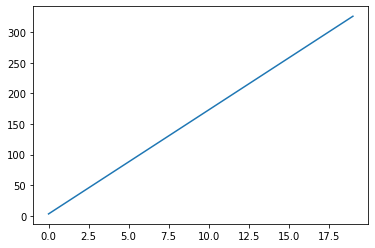

In [8]:
# df = pd.DataFrame(dataset[:,1:], columns=("X", "Y"))
# df.plot.scatter(x="X", y="Y", c="Y", cmap='viridis', title="yo mama")

x = np.array(range(20))
y = w0 + w1*x
plt.plot(x, y) 

plot the line over the test data

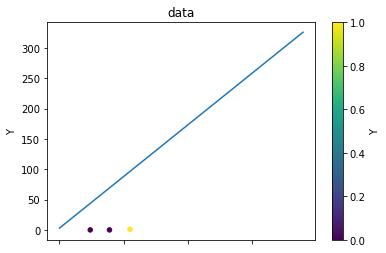

In [9]:
df = pd.DataFrame([[2.4, 0],[5.5,1],[3.9,0]], columns=("X", "Y"))
df.plot.scatter(x="X", y="Y", c="Y", cmap='viridis', title="data")

x = np.array(range(20))
y = w0 + w1*x
plt.plot(x, y)

as we can see the when multiplying the y values by the x psuedo inverse we get the same weights as were produced from the linear regression model. this means that our solution is unique.

In [10]:
x = np.array(dataset[:,:2])
y = np.array(dataset[:,2])
xt = x.transpose()
x_psuedo_inverse = np.matmul(np.linalg.pinv(x), y)
print("x's inverser * y:", x_psuedo_inverse[0], x_psuedo_inverse[1])
print("produced weights:", float(w0),float(w1))

x's inverser * y: 0.5 5.551115123125783e-17
produced weights: 3.0 17.0


2) Q. can this regression  line be used as a classifier? A. YES <br/>
3) Q. if not justify with brief reasons A. N/A <br/>
4) Q. If yes, state whether the resulting classifier A. Unique <br/>
5) Q. If your answer is “unique,” write the equation of the classifier (the decision boundary), <br/>
        and indicate how your classifierclassifiesthe testpoints. What are the error rates of your <br/>
        classifier on the training set and, separately, on thetest set?  <br/> <br/>
        A. equation y^ = 179/1580 + 129/1580 * x <br/>
        on the training set this classifier has 33.33333...% error rates <br/>
        on the test set this classifier has 0% error rates <br/> <br/>
6) Q. If your answer was “non-unique,” provide threedifferent classifiers (i.e., their equations), <br/>
        the corresponding classificationsof the test pointsas well the corresponding error rates <br/>
        on training and test data. <br/>
        A. N/A